In [12]:
import os
import sys
import time

import json
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup as bsoup

try:
    get_ipython()
    from tqdm.notebook import tqdm
except NameError:
    from tqdm import tqdm
    
%load_ext autoreload
%autoreload 2

In [2]:
import nord_vpn

In [13]:
from sys import platform

In [14]:
if platform != "darwin":
    pass
    vpn = nord_vpn.NordVPN()
    vpn.connect()
    vpn.disconnect()
    vpn.check_status()

In [19]:
import scrape

In [23]:
url = scrape.get_michelin_guide_url("new york", "new york", stars="1")
print(url)

https://guide.michelin.com/us/en/new-york-state/new-york/restaurants/1-star-michelin


In [25]:
restaurant_html_list = scrape.get_michelin_guide_restaurant_html_list("new york", "new york", stars="3")
restaurant_html = restaurant_html_list[0]

In [29]:
scrape.MichelinRestaurant(restaurant_html_list[1])

['355', 'USD', '•', 'Contemporary', 'French']


Per Se | 3 Stars | 4.6 Stars (Google Reviews)| 355

In [32]:
restaurant_html_list = scrape.get_michelin_guide_restaurant_html_list("new york", "new york", stars="1+")
restaurant_list = scrape.get_convert_restaurant_html_list_to_restaurants(restaurant_html_list)
restaurant_list = sorted(restaurant_list)

['138', '-', '188', 'USD', '•', 'Contemporary']


['American', 'Californian']
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/cole/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/vy/ng8z35ts71z736pdwsgxy_300000gn/T/ipykernel_12439/2141405615.py", line 2, in <cell line: 2>
    restaurant_list = scrape.get_convert_restaurant_html_list_to_restaurants(restaurant_html_list)
  File "/Users/cole/Documents/_projects/restaurant_finder/scrape.py", line 244, in get_convert_restaurant_html_list_to_restaurants
    return [MichelinRestaurant(restaurant_html) for restaurant_html in tqdm(restaurant_html_list, desc=desc, unit=" Restaurant")]
  File "/Users/cole/Documents/_projects/restaurant_finder/scrape.py", line 244, in <listcomp>
    return [MichelinRestaurant(restaurant_html) for restaurant_html in tqdm(restaurant_html_list, desc=desc, unit=" Restaurant")]
  File "/Users/cole/Documents/_projects/restaurant_finder/scrape.py", line 189, in __

# Michelin Star Restaurants

In [ ]:
restaurant_data = pd.DataFrame([(restaurant.name, restaurant.cost, restaurant.distinction,
                                 restaurant.google_rating, restaurant) for restaurant in restaurant_list],
                               columns=["name", "cost", "michelin_stars", "google_rating", "restaurant"])

In [ ]:
restaurant_data = restaurant_data.sort_values(by=["cost", "google_rating"], ascending=[True, False]).reset_index()
restaurant_data.head(50)

# Bib Gourmand

In [16]:
bib_gourmand_restaurant_html_list = scrape.get_michelin_guide_restaurant_html_list("new york", "new york", stars="0")
bib_gourmand_restaurant_list = scrape.get_convert_restaurant_html_list_to_restaurants(bib_gourmand_restaurant_html_list)
bib_gourmand_restaurant_list = sorted(bib_gourmand_restaurant_list)

In [17]:
bib_gourmand_restaurant_data = pd.DataFrame([(restaurant.name, restaurant.cost, restaurant.distinction,
                                 restaurant.google_rating, restaurant) for restaurant in bib_gourmand_restaurant_list],
                               columns=["name", "cost", "michelin_stars", "google_rating", "restaurant"])

bib_gourmand_restaurant_data = bib_gourmand_restaurant_data.sort_values(by=["cost", "google_rating"],
                                                                        ascending=[True, False]).reset_index()
bib_gourmand_restaurant_data.query("google_rating == 4.3").head(50)

,index,name,cost,michelin_stars,google_rating,restaurant
7,0,West New Malaysia,25,Bib Gourmand,4.3,West New Malaysia | Bib Gourmand | 4.3 Stars (...
8,3,Soba-Ya,25,Bib Gourmand,4.3,Soba-Ya | Bib Gourmand | 4.3 Stars (Google Rev...
9,6,Nyonya,25,Bib Gourmand,4.3,Nyonya | Bib Gourmand | 4.3 Stars (Google Revi...
10,7,Mile End,25,Bib Gourmand,4.3,Mile End | Bib Gourmand | 4.3 Stars (Google Re...
11,11,J.G. Melon,25,Bib Gourmand,4.3,J.G. Melon | Bib Gourmand | 4.3 Stars (Google ...
18,15,Mexicosina,30,Bib Gourmand,4.3,Mexicosina | Bib Gourmand | 4.3 Stars (Google ...
29,23,Xilonen,40,Bib Gourmand,4.3,Xilonen | Bib Gourmand | 4.3 Stars (Google Rev...
32,32,Klein's,44,Bib Gourmand,4.3,Klein's | Bib Gourmand | 4.3 Stars (Google Rev...
34,33,Rangoon,45,Bib Gourmand,4.3,Rangoon | Bib Gourmand | 4.3 Stars (Google Rev...
35,36,Beatstro,45,Bib Gourmand,4.3,Beatstro | Bib Gourmand | 4.3 Stars (Google Re...


# Yelp Data Pulling

In [28]:
YELP_API_KEY = "YGZDloqBNKFrYEY5hXc1W9oCwROWm0xtAe93k3_a1dcA8IFy-xkH4c9xxyVoQxKf796DVBLmsR24YkRCf8l73JuWDyuQi5KnV9FVIY_OMo6xFxvSmh07ZG_Vu2z9YXYx"

In [29]:
YELP_API_HOST = 'https://api.yelp.com'
YELP_SEARCH_PATH = '/v3/businesses/search'
YELP_BUSINESS_PATH = '/v3/businesses/'

YELP_DEFAULT_LOCATION = 'NYC'
SEARCH_LIMIT = 3


In [30]:
YELP_REQUEST_HEADER = {
    'Authorization': f'Bearer {YELP_API_KEY}',
}


def get_yelp_restaurants(term: str, location: str = YELP_DEFAULT_LOCATION, **params: dict):
    """
    suggested search terms:
    
    radius: in meters
    limit: max items to return (max value is 50)
    offset: list offset number
    sort_by: best_match, rating, review_count or distance
    price: 1 = $, 2 = $$, 3 = $$$, 4 = $$$$, example: 1,2,4
    
    """
    url_form = YELP_API_HOST + YELP_SEARCH_PATH + "?"
    url_form = f"{url_form}?term={term}&location={location}"
    for key, value in params.items():
        url_form += f"&{key}={value}"

    req = requests.request('GET', url_form, headers=YELP_REQUEST_HEADER)
    return req


def get_all_yelp_restaurants(term: str, location: str = YELP_DEFAULT_LOCATION, top=None, offset: int = 0,
                             **params: dict):
    """"""
    limit = 50
    
    assert "limit" not in params and "offset" not in params
    
    top = min(999, top)
    params["limit"] = limit
    params["offset"] = offset
    restaurant_data = get_yelp_restaurants(term, location=location, **params).json()
    total_restaurants = restaurant_data["total"]
    
    if total_restaurants == 0:
        raise ValueError("No restaurants found.")
    
    if total_restaurants < limit:
        return restaurant_data

    max_index = top // limit if top else total_restaurants // limit
    
    pbar = tqdm(total=max_index * 50, unit=" restaurants", desc="Gathering Restaurant Data")
    
    for pull_index in range(max_index):
        params["offset"] += 50
        additional_restaurant_data = get_yelp_restaurants(term, location=location, **params).json()
        if len(additional_restaurant_data) == 0:
            break
        restaurant_data["businesses"] += additional_restaurant_data["businesses"]
        time.sleep(1.1)
        pbar.update(50)
    
    return restaurant_data

req = get_yelp_restaurants("restaurant", price="4", sort_by="rating")

In [42]:
import sys
sys.path.append("../helpers/")
import helpers


def cached_function(path, function, *args, overwrite: bool = False, **params):
    """"""
    if os.path.exists(path) and not overwrite:
        return helpers.pickle_load(path)

    data = function(*args, **params)
    helpers.pickle_dump(data, path)
    return data

In [47]:
data = cached_function("yelp_data.pkl", get_all_yelp_restaurants,
                       "restaurant", price="1", sort_by="rating", location="NYC", top=1000, overwrite=False)

In [48]:
columns = ['name', 'review_count', 'rating', 'id', 'alias']

restaurant_list = []
for restaurant in data["businesses"]:
    row = [restaurant[key] for key in columns]
    row.append(", ".join(item["title"] for item in restaurant["categories"]))
    row.append(", ".join(restaurant["location"]["display_address"]))
    restaurant_list.append(row)
    
restaurant_data = pd.DataFrame(restaurant_list, columns=columns + ["categories", "address"])

In [49]:
restaurant_data

,name,review_count,rating,id,alias,categories,address
0,Frenchy's Food Truck,96,5.0,nSUIB7itn5ufTUzwa1IgxA,frenchys-food-truck-brooklyn,"Coffee & Tea, Food Trucks, Patisserie/Cake Shop","341 Eastern Pkwy, Brooklyn, NY 11238"
1,Whistle & Fizz,245,5.0,OPiO2ZuK4M2f55qmuNfWUQ,whistle-and-fizz-new-york-4,Coffee & Tea,"254 Greene St, New York, NY 10003"
2,Juice Vitality,217,5.0,ytYVlCkrzcAxxUcbT4NTgA,juice-vitality-new-york,"Juice Bars & Smoothies, Bubble Tea, Acai Bowls","192 1st Ave, New York, NY 10009"
3,Pabade Cafe and Bakery,64,5.0,4OjAtoUyYI5CRn1iY3iH_w,pabade-cafe-and-bakery-new-york-2,"Coffee & Tea, Bakeries, Cafes","135 East 110 St, New York, NY 10029"
4,Tres Leches Cafe - Harlem,166,5.0,lqnI_jISnH7RZWlPtKkViQ,tres-leches-cafe-harlem-new-york,"Bakeries, Desserts, Latin American","356 E 112th St, New York, NY 10029"
...,...,...,...,...,...,...,...
995,Tawa Food,86,4.0,LaMbEoM5Vw9CQP5usaD2xA,tawa-food-jackson-heights,Himalayan/Nepalese,"3738 72nd St, Jackson Heights, NY 11372"
996,Daily Press Coffee and Bar,85,4.0,KGAF6jKzyQ9fDbtUm_iHWQ,daily-press-coffee-and-bar-brooklyn,"Coffee & Tea, Bars, Breakfast & Brunch","38 Somers St, Brooklyn, NY 11233"
997,Vincent's Deli & Pizzeria,48,4.5,jHv7rAWtDG50AmZlGJGhqg,vincents-deli-and-pizzeria-staten-island,"Italian, Delis, Pizza","500 Henderson Ave, Staten Island, NY 10310"
998,Peter Dillon's,84,4.0,89cuk6IhTJbmk27_N8G3Ew,peter-dillons-new-york-4,Irish Pub,"2 E 36th St, New York, NY 10016"


(array([286.,   0.,   0.,   0.,   0., 634.,   0.,   0.,   0.,  80.]),
 array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 10 artists>)

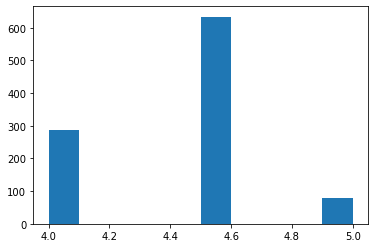

In [50]:
plt.hist(restaurant_data["rating"])

In [ ]:
restaurant_data["google_review"] = get_google_rating(restaurant_data["alias"])

Fetching Google Reviews:   0%|          | 0/1000 [00:00<?, ? Restaurant/s]

In [ ]:
restaurant_data

In [ ]:
t = YelpRestaurant(data["businesses"][0])
vars(t)

In [ ]:
class YelpRestaurant:
    def __init__(self, yelp_data: dict):
        for key, value in yelp_data.items():
            self.__dict__[key] = value
        
        self.google_rating = get_google_rating(f"{self.alias}")

In [ ]:
data["businesses"][3]